In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
year = range(2008, 2019)
table = [5, 4, 4, 4, 4, 3, 3, 5, 5, 5, 6]

fc_all = pd.DataFrame()

for i, y in enumerate(year):
    for j in range(1, table[i]+1):
        filepath = f"{y}_{j}_grouped.csv"
        new_df = pd.read_csv(filepath)
        fc_all = pd.concat([fc_all, new_df])

fc_all.shape

(1519103, 13)

In [3]:
fc_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1519103 entries, 0 to 40257
Data columns (total 13 columns):
recipient_parent_name1                                 1519103 non-null object
current_total_value_of_award                           1519103 non-null float64
potential_total_value_of_award                         1519103 non-null float64
number_of_offers_received                              1519103 non-null float64
number_of_employees                                    1496022 non-null float64
annual_revenue                                         1496025 non-null float64
awards_counts                                          1519103 non-null int64
recipient_name                                         1519074 non-null object
recipient_parent_name                                  1519103 non-null object
organizational_type                                    304333 non-null object
contracting_officers_determination_of_business_size    1519052 non-null object
organizational_ty

In [4]:
fc_all = fc_all[fc_all.current_total_value_of_award != 0]

In [5]:
fc_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677656 entries, 1 to 40257
Data columns (total 13 columns):
recipient_parent_name1                                 677656 non-null object
current_total_value_of_award                           677656 non-null float64
potential_total_value_of_award                         677656 non-null float64
number_of_offers_received                              677656 non-null float64
number_of_employees                                    657052 non-null float64
annual_revenue                                         657053 non-null float64
awards_counts                                          677656 non-null int64
recipient_name                                         677652 non-null object
recipient_parent_name                                  677656 non-null object
organizational_type                                    276993 non-null object
contracting_officers_determination_of_business_size    677649 non-null object
organizational_type.1       

In [6]:
fc_all.head(100)

,recipient_parent_name1,current_total_value_of_award,potential_total_value_of_award,number_of_offers_received,number_of_employees,annual_revenue,awards_counts,recipient_name,recipient_parent_name,organizational_type,contracting_officers_determination_of_business_size,organizational_type.1,year
1,123COMPUTERSUPPLIESINC,5240.00,5240.00,0.0,1.000000e+00,2.826250e+05,1,123 COMPUTER SUPPLIES INC,123 COMPUTER SUPPLIES INC,NaN,SMALL BUSINESS,NaN,2008
2,17MACHINERYLLC,67900.00,67900.00,5.0,3.000000e+00,3.933950e+05,2,17 MACHINERY LLC,17 MACHINERY LLC,CORPORATE NOT TAX EXEMPT,SMALL BUSINESS,CORPORATE NOT TAX EXEMPT,2008
4,1BEYONDINC,12528.95,12528.95,2.0,1.100000e+01,1.300000e+06,1,"1 BEYOND, INC.",1 BEYOND INC.,NaN,SMALL BUSINESS,NaN,2008
5,1MDINC,87333.00,87333.00,1.0,8.000000e+01,1.200000e+07,1,"1MD, INC.",1MD INC.,CORPORATE NOT TAX EXEMPT,SMALL BUSINESS,CORPORATE NOT TAX EXEMPT,2008
6,1SOURCEMATERIALHANDLINGINC,18582.81,18582.81,2.0,0.000000e+00,0.000000e+00,1,1 SOURCE MATERIAL HANDLING LLC,1 SOURCE MATERIAL HANDLING INC.,NaN,SMALL BUSINESS,NaN,2008
8,2020COMPANYLLC,11481929.55,38986895.57,8.0,2.696667e+03,2.408600e+08,30,"2020 COMPANY, LLC",2020 COMPANY LLC,NaN,SMALL BUSINESS,NaN,2008
12,2PISOLUTIONSINC,229610.01,229610.01,1.0,1.000000e+01,1.300000e+06,1,2PI SOLUTIONS INC,2PI SOLUTIONS INC,NaN,SMALL BUSINESS,NaN,2008
14,3MCOMPANY,2480241.81,2480241.81,1110.0,5.401997e+06,7.305345e+10,83,3M COMPANY,3M COMPANY,NaN,OTHER THAN SMALL BUSINESS,NaN,2008
16,3VETSINC,77141.84,77141.84,14050.0,4.000000e+00,1.250000e+05,61,3 VETS INCORPORATED,3-VETS INC.,NaN,SMALL BUSINESS,NaN,2008
17,4IMPRINTGROUPPLC,203136.80,203136.80,27.0,6.250000e+02,9.300000e+07,19,4IMPRINT INCORPORATED,4IMPRINT GROUP PLC,NaN,SMALL BUSINESS,NaN,2008


In [7]:
fc_all.isnull().sum()

recipient_parent_name1                                      0
current_total_value_of_award                                0
potential_total_value_of_award                              0
number_of_offers_received                                   0
number_of_employees                                     20604
annual_revenue                                          20603
awards_counts                                               0
recipient_name                                              4
recipient_parent_name                                       0
organizational_type                                    400663
contracting_officers_determination_of_business_size         7
organizational_type.1                                  400663
year                                                        0
dtype: int64

In [8]:
def f(x):
     return pd.Series(dict(current_award = x['current_total_value_of_award'].sum(),
                           potential_award = x['potential_total_value_of_award'].sum(), 
                           offers_received = x['number_of_offers_received'].sum(), 
                           num_employees = x['number_of_employees'].mean(), 
                           annual_revenue = x['annual_revenue'].mean(),
                           award_count = x['recipient_parent_name1'].count(),
                           recipient_name = x['recipient_parent_name'].unique()[0], 
                           organizational_type = x['organizational_type'].unique()[0],
                           business_size = x['contracting_officers_determination_of_business_size'].unique()[0]))

fc_g = fc_all.groupby(['recipient_parent_name1', 'year']).apply(f)

In [10]:
fc_g.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 328186 entries, (03SLINDUSTRIESINC, 2017) to (ZZOUNDSMUSICLLC, 2018)
Data columns (total 9 columns):
current_award          328186 non-null float64
potential_award        328186 non-null float64
offers_received        328186 non-null float64
num_employees          322181 non-null float64
annual_revenue         322181 non-null float64
award_count            328186 non-null int64
recipient_name         328186 non-null object
organizational_type    145568 non-null object
business_size          328183 non-null object
dtypes: float64(5), int64(1), object(3)
memory usage: 25.2+ MB


In [11]:
fc_g.reset_index(inplace = True)

In [12]:
fc_g.head()

,recipient_parent_name1,year,current_award,potential_award,offers_received,num_employees,annual_revenue,award_count,recipient_name,organizational_type,business_size
0,03SLINDUSTRIESINC,2017,99705.97,99705.97,2.0,0.0,1.0,1,03SL INDUSTRIES INC,NaN,SMALL BUSINESS
1,03SLINDUSTRIESINC,2018,398823.88,398823.88,8.0,0.0,1.0,1,03SL INDUSTRIES INC,NaN,SMALL BUSINESS
2,0BASEDESIGNLLC,2017,99964.47,149712.55,999.0,2.0,50000.0,1,0 BASE DESIGN LLC,NaN,SMALL BUSINESS
3,10001100WILSONOWNERLLC,2018,38412.00,38412.00,3.0,1.0,22500000.0,3,1000-1100 WILSON OWNER LLC,NaN,OTHER THAN SMALL BUSINESS
4,10001NEWHAMPSHIREAVENUEINC,2018,128522.88,220759.92,1.0,10.0,4611000.0,1,10001 NEW HAMPSHIRE AVENUE INC,NaN,SMALL BUSINESS


In [13]:
fc_g.to_csv('fedcon_grouped.csv')

In [14]:
conlist = fc_g['recipient_name'].unique()

In [15]:
len(conlist)

151139

In [16]:
conlist

array(['03SL INDUSTRIES INC', '0 BASE DESIGN  LLC',
       '1000-1100 WILSON OWNER  LLC', ..., 'ZYVEX LABS LLC',
       'Z & Z MEDICAL  INC.', 'ZZOUNDS MUSIC  L.L.C.'], dtype=object)

In [ ]:
import os
import time
for id in range(100000000):
    syscmd = '/usr/local/bin/wget https://www.opensecrets.org/orgs/totals.php\?id\=D{:09d} -w1'.format(id)
    print(syscmd)
    os.system(syscmd)
    time.sleep(0.25)

In [83]:
oid = []
for i in range(46581,74906):
    oid.append(f'{i:09}')
oid

['000046581',
 '000046582',
 '000046583',
 '000046584',
 '000046585',
 '000046586',
 '000046587',
 '000046588',
 '000046589',
 '000046590',
 '000046591',
 '000046592',
 '000046593',
 '000046594',
 '000046595',
 '000046596',
 '000046597',
 '000046598',
 '000046599',
 '000046600',
 '000046601',
 '000046602',
 '000046603',
 '000046604',
 '000046605',
 '000046606',
 '000046607',
 '000046608',
 '000046609',
 '000046610',
 '000046611',
 '000046612',
 '000046613',
 '000046614',
 '000046615',
 '000046616',
 '000046617',
 '000046618',
 '000046619',
 '000046620',
 '000046621',
 '000046622',
 '000046623',
 '000046624',
 '000046625',
 '000046626',
 '000046627',
 '000046628',
 '000046629',
 '000046630',
 '000046631',
 '000046632',
 '000046633',
 '000046634',
 '000046635',
 '000046636',
 '000046637',
 '000046638',
 '000046639',
 '000046640',
 '000046641',
 '000046642',
 '000046643',
 '000046644',
 '000046645',
 '000046646',
 '000046647',
 '000046648',
 '000046649',
 '000046650',
 '000046651',
 '0000

In [84]:
contribs_all = pd.DataFrame()

for i in oid:
    
    tables = pd.read_html(f"/Users/ptw/wwget/totals.php?id=D{i}")
    contribs = tables[0]
    f = open(f"/Users/ptw/wwget/totals.php?id=D{i}", "r")
    # use readlines to read all lines in the file
    # The variable "lines" is a list containing all lines in the file
    lines = f.readlines()
    title = lines[8]
    # close the file after reading the lines.
    f.close()
    name = re.search('<title>(.*): Total Contributions | OpenSecrets</title>\n', title).group(1)
    contribs['org_id'] = f"D{i}"
    contribs['org_name'] = name  
    cols = list(contribs.columns.copy())
    cols.insert(0, cols.pop())
    cols.insert(0, cols.pop())
    contribs = contribs[cols]
    contribs_all = pd.concat([contribs_all, contribs])
    contribs_all = contribs_all.reset_index(drop=True)

In [85]:
contribs_all.tail()

,org_id,org_name,Cycle,Total,Democrats,Republicans,% to Dems,% to Repubs,Individuals,PACs,Soft (Indivs),Soft (Orgs)
127792,D000074901,,TOTAL,NaN,NaN,NaN,0%,0%,NaN,NaN,NaN,NaN
127793,D000074902,,TOTAL,NaN,NaN,NaN,0%,0%,NaN,NaN,NaN,NaN
127794,D000074903,,TOTAL,NaN,NaN,NaN,0%,0%,NaN,NaN,NaN,NaN
127795,D000074904,,TOTAL,NaN,NaN,NaN,0%,0%,NaN,NaN,NaN,NaN
127796,D000074905,,TOTAL,NaN,NaN,NaN,0%,0%,NaN,NaN,NaN,NaN


In [86]:
contribs_all_3 = contribs_all[contribs_all.Cycle != 'TOTAL']
contribs_all_3

,org_id,org_name,Cycle,Total,Democrats,Republicans,% to Dems,% to Repubs,Individuals,PACs,Soft (Indivs),Soft (Orgs)
0,D000046581,Alameda Alliance for Health,2018,"$1,289","$1,189",$0,92%,0%,"$1,289",$0,$0,$0
1,D000046581,Alameda Alliance for Health,2014,"$1,000","$1,000",$0,100%,0%,"$1,000",$0,$0,$0
2,D000046581,Alameda Alliance for Health,2010,$20,$0,$0,0%,0%,$0,$0,$0,$0
3,D000046581,Alameda Alliance for Health,2008,"$2,750","$2,750",$0,100%,0%,"$2,750",$0,$0,$0
4,D000046581,Alameda Alliance for Health,2004,$250,$250,$0,100%,0%,$250,$0,$0,$0
5,D000046581,Alameda Alliance for Health,2002,$250,$250,$0,100%,0%,$250,$0,$0,$0
8,D000046583,Alameda Contra Costa Transit District,2018,$50,$50,$0,98%,0%,$50,$0,$0,$0
13,D000046587,Alameda County Medical Center,2020,"$1,000","$1,000",$0,100%,0%,"$1,000",$0,$0,$0
14,D000046587,Alameda County Medical Center,2018,"$5,435","$5,100",$335,94%,6%,"$5,435",$0,$0,$0
15,D000046587,Alameda County Medical Center,2016,"$5,687","$5,492",$195,97%,3%,"$5,687",$0,$0,$0


In [87]:
contribs_all_3.to_csv('contribs_all_3.csv')

In [89]:
df1 = pd.read_csv('contribs_all_1.csv')

/Users/ptw/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [90]:
df1.head()

,Unnamed: 0,% to Dems,% to Repubs,Cycle,Democrats,Individuals,PACs,Republicans,Soft (Indivs),Soft (Orgs),Total,org_id,org_name,0,1
0,1,0%,100%,2008.0,$0,"$10,600",$0,"$10,600",$0,$0,"$10,600",D000000001,Joseph E Seagram & Sons,NaN,NaN
1,2,0%,100%,2006.0,$0,$250,$0,$250,$0,$0,$250,D000000001,Joseph E Seagram & Sons,NaN,NaN
2,3,80%,20%,2004.0,"$2,000","$2,500",$0,$500,$0,$0,"$2,500",D000000001,Joseph E Seagram & Sons,NaN,NaN
3,4,61%,39%,1998.0,"$1,005,124","$478,511","$411,290","$643,923","$187,358","$576,488","$1,653,647",D000000001,Joseph E Seagram & Sons,NaN,NaN
4,5,67%,33%,1996.0,"$1,766,279","$368,191","$308,875","$861,370","$929,899","$1,020,684","$2,627,649",D000000001,Joseph E Seagram & Sons,NaN,NaN


In [91]:
df2 = pd.read_csv('contribs_all_2.csv')

In [92]:
df2.head()

,Unnamed: 0,org_id,org_name,Cycle,Total,Democrats,Republicans,% to Dems,% to Repubs,Individuals,PACs,Soft (Indivs),Soft (Orgs)
0,0,D000042417,Charming Shoppes Inc,2018,$658,$598,$0,91%,0%,$658,$0,$0,$0
1,1,D000042417,Charming Shoppes Inc,2016,"$4,560","$4,310",$0,95%,0%,"$4,310",$0,$250,$0
2,2,D000042417,Charming Shoppes Inc,2014,$600,$600,$0,100%,0%,$600,$0,$0,$0
3,3,D000042417,Charming Shoppes Inc,2012,"$6,333",$500,"$5,833",8%,92%,"$6,333",$0,$0,$0
4,4,D000042417,Charming Shoppes Inc,2010,"$2,887","$2,887",$0,100%,0%,"$2,887",$0,$0,$0


In [93]:
df3 = pd.read_csv('contribs_all_3.csv')

In [94]:
df3.head()

,Unnamed: 0,org_id,org_name,Cycle,Total,Democrats,Republicans,% to Dems,% to Repubs,Individuals,PACs,Soft (Indivs),Soft (Orgs)
0,0,D000046581,Alameda Alliance for Health,2018,"$1,289","$1,189",$0,92%,0%,"$1,289",$0,$0,$0
1,1,D000046581,Alameda Alliance for Health,2014,"$1,000","$1,000",$0,100%,0%,"$1,000",$0,$0,$0
2,2,D000046581,Alameda Alliance for Health,2010,$20,$0,$0,0%,0%,$0,$0,$0,$0
3,3,D000046581,Alameda Alliance for Health,2008,"$2,750","$2,750",$0,100%,0%,"$2,750",$0,$0,$0
4,4,D000046581,Alameda Alliance for Health,2004,$250,$250,$0,100%,0%,$250,$0,$0,$0


In [95]:
df = pd.concat([df1, df2, df3])
df

/Users/ptw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,% to Dems,% to Repubs,0,1,Cycle,Democrats,Individuals,PACs,Republicans,Soft (Indivs),Soft (Orgs),Total,Unnamed: 0,org_id,org_name
0,0%,100%,NaN,NaN,2008.0,$0,"$10,600",$0,"$10,600",$0,$0,"$10,600",1,D000000001,Joseph E Seagram & Sons
1,0%,100%,NaN,NaN,2006.0,$0,$250,$0,$250,$0,$0,$250,2,D000000001,Joseph E Seagram & Sons
2,80%,20%,NaN,NaN,2004.0,"$2,000","$2,500",$0,$500,$0,$0,"$2,500",3,D000000001,Joseph E Seagram & Sons
3,61%,39%,NaN,NaN,1998.0,"$1,005,124","$478,511","$411,290","$643,923","$187,358","$576,488","$1,653,647",4,D000000001,Joseph E Seagram & Sons
4,67%,33%,NaN,NaN,1996.0,"$1,766,279","$368,191","$308,875","$861,370","$929,899","$1,020,684","$2,627,649",5,D000000001,Joseph E Seagram & Sons
5,73%,27%,NaN,NaN,1994.0,"$406,924","$103,070","$216,370","$148,070","$100,000","$135,554","$554,994",6,D000000001,Joseph E Seagram & Sons
6,45%,55%,NaN,NaN,1992.0,"$497,470","$118,285","$258,250","$610,702","$650,000","$81,637","$1,108,172",7,D000000001,Joseph E Seagram & Sons
7,72%,28%,NaN,NaN,1990.0,"$165,400","$71,850","$157,025","$63,475",NaN,NaN,"$228,875",8,D000000001,Joseph E Seagram & Sons
8,32%,68%,NaN,NaN,1998.0,"$303,611","$24,350","$780,929","$640,034",$0,"$139,366","$944,645",12,D000000004,GTE Corp
9,26%,74%,NaN,NaN,1996.0,"$181,952","$49,679","$589,791","$510,989",$0,"$54,150","$693,620",13,D000000004,GTE Corp


In [96]:
df.to_csv('df.csv')

In [124]:
df['org_name'] = df['org_name'].str.upper() 
df.head()

,% to Dems,% to Repubs,0,1,Cycle,Democrats,Individuals,PACs,Republicans,Soft (Indivs),Soft (Orgs),Total,Unnamed: 0,org_id,org_name
0,0%,100%,NaN,NaN,2008.0,$0,"$10,600",$0,"$10,600",$0,$0,"$10,600",1,D000000001,JOSEPH E SEAGRAM & SONS
1,0%,100%,NaN,NaN,2006.0,$0,$250,$0,$250,$0,$0,$250,2,D000000001,JOSEPH E SEAGRAM & SONS
2,80%,20%,NaN,NaN,2004.0,"$2,000","$2,500",$0,$500,$0,$0,"$2,500",3,D000000001,JOSEPH E SEAGRAM & SONS
3,61%,39%,NaN,NaN,1998.0,"$1,005,124","$478,511","$411,290","$643,923","$187,358","$576,488","$1,653,647",4,D000000001,JOSEPH E SEAGRAM & SONS
4,67%,33%,NaN,NaN,1996.0,"$1,766,279","$368,191","$308,875","$861,370","$929,899","$1,020,684","$2,627,649",5,D000000001,JOSEPH E SEAGRAM & SONS


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236867 entries, 0 to 99471
Data columns (total 15 columns):
% to Dems        236860 non-null object
% to Repubs      236860 non-null object
0                7 non-null object
1                7 non-null object
Cycle            236860 non-null float64
Democrats        236860 non-null object
Individuals      236860 non-null object
PACs             236860 non-null object
Republicans      236860 non-null object
Soft (Indivs)    231005 non-null object
Soft (Orgs)      231005 non-null object
Total            236860 non-null object
Unnamed: 0       236867 non-null int64
org_id           236867 non-null object
org_name         235365 non-null object
dtypes: float64(1), int64(1), object(13)
memory usage: 28.9+ MB


In [136]:
orgs_w_pacs = df[df['PACs'] != '$0']
orgs_w_pacs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41296 entries, 3 to 99460
Data columns (total 15 columns):
% to Dems        41289 non-null object
% to Repubs      41289 non-null object
0                7 non-null object
1                7 non-null object
Cycle            41289 non-null float64
Democrats        41289 non-null object
Individuals      41289 non-null object
PACs             41289 non-null object
Republicans      41289 non-null object
Soft (Indivs)    39772 non-null object
Soft (Orgs)      39772 non-null object
Total            41289 non-null object
Unnamed: 0       41296 non-null int64
org_id           41296 non-null object
org_name         41199 non-null object
dtypes: float64(1), int64(1), object(13)
memory usage: 5.0+ MB


In [2]:
orgs_w_pacs = pd.read_csv('opensecrets_pacs.csv')

/Users/ptw/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
orgs_w_pacs['org_name'] = orgs_w_pacs['org_name'].str.upper() 


In [4]:
fc_g = pd.read_csv('fedcon_parent_100m_final.csv')

In [46]:
fc_all = pd.read_csv('fedcon_grouped.csv')

In [59]:
def func(x):
     return pd.Series(dict(current_award = x['current_award'].sum(),
                           potential_award = x['potential_award'].sum(), 
                           offers_received = x['offers_received'].sum(), 
                           num_employees = x['num_employees'].mean(), 
                           annual_revenue = x['annual_revenue'].mean(),
                           award_count = x['award_count'].count(),
                           recipient_name = x['recipient_name'].unique()[0], 
                           organizational_type = x['organizational_type'].unique()[0],
                           business_size = x['business_size'].unique()[0]))

In [49]:
fc_ga = fc_all.groupby(['recipient_parent_name1']).apply(func)

In [52]:
fc_ga.to_csv('fedcon_grouped_allyear.csv')

In [53]:
fedcon_50mil = fc_ga[fc_ga.current_award > 50000000]
fedcon_50mil = fedcon_50mil.reset_index()
fedcon_50mil.head()

,recipient_parent_name1,current_award,potential_award,offers_received,num_employees,annual_revenue,award_count,recipient_name,organizational_type,business_size
0,10TANKERAIRCARRIERLLC,4.230000e+09,4.605000e+09,421.0,12.769147,8.660938e+06,6,10 TANKER AIR CARRIER LLC,OTHER,SMALL BUSINESS
1,180SINC,7.565709e+07,7.565709e+07,147.0,10.000000,0.000000e+00,4,180S INC.,NaN,SMALL BUSINESS
2,1901GROUPLLC,5.689863e+08,1.734696e+09,13133.0,25.877293,2.136121e+06,4,1901 GROUP LLC,OTHER,SMALL BUSINESS
3,1SOURCECONSULTINGINC,8.811237e+08,5.828028e+11,21714.0,453.668557,1.748794e+08,5,1 SOURCE CONSULTING INC.,NaN,SMALL BUSINESS
4,1STAMERICANMEDICALDISTRIBUTORSINC,5.107743e+07,5.529631e+07,1871.0,4.204144,3.709187e+06,7,1ST AMERICAN MEDICAL DISTRIBUTORS INC.,CORPORATE NOT TAX EXEMPT,SMALL BUSINESS


In [56]:
conlist = fedcon_50mil.recipient_parent_name1.unique()
len(conlist)

7381

In [57]:
fedcon_final50 = fc_all[fc_all.recipient_parent_name1.isin(conlist)]
fedcon_final50.to_csv('fedcon_50m_final.csv', index=False)

In [60]:
years_list = [2008, 2009, 2011, 2013, 2015, 2017, 2019]
fedcon_allcycles = pd.DataFrame()
f = fedcon_final50.copy()#[:100]

for y in years_list:
    if y != 2008:
        t = f[(f.year==y) | (f.year==y+1)].groupby('recipient_parent_name1').apply(func)
        t['year'] = y+1
        fedcon_allcycles = pd.concat([fedcon_allcycles, t], sort=False)
    else:
        t = f[(f.year==y)].groupby('recipient_parent_name1').apply(func)
        t['year'] = y
        fedcon_allcycles = pd.concat([fedcon_allcycles, t], sort=False)
        
    
    
fedcon_allcycles = fedcon_allcycles.reset_index()

In [62]:
fedcon_allcycles.to_csv('fedcon_allcycles.csv', index=False)

In [64]:
freq_words = ['assn',
 'of',
 'for',
 'pac',
 'corp',
 'corporation',
 'inc',
 'cmte',
 'group',
 'co',
 'international',
 'union',
 'llp',
 'limited',
 'company',
 'plc',
 'llc',
 'ltd',
 'to',
 'holdings',
 'al',
 'et',
 'a',
 'the',
 'companies',
 'association'
]

In [67]:
o = orgs_w_pacs.copy()
o['org_name_clean'] = o.org_name.str.lower().str.replace('[^\w\s]','')  # lower, replace punctuation
o = o[o.org_name_clean.isnull() == False]  # drop nas
o.org_name_clean = o.org_name_clean.apply(lambda x: " ".join(x for x in x.split() if x not in freq_words))  # remove freqs
# o.groupby('org_name_clean').size()
list(o.org_name_clean.unique())

['joseph e seagram sons',
 'gte',
 'american general',
 'chevron',
 'coastal',
 'pacific telesis',
 'nynex',
 'mca',
 'champion',
 'salomon brothers',
 'ameritech',
 'atlantic richfield',
 'tenneco',
 'barnett banks',
 'sunamerica',
 'chemical bank',
 'monsanto',
 'associated milk producers',
 'american fedn state county municipal employees',
 'national realtors',
 'national education',
 'american justice',
 'teamsters',
 'altria',
 'american medical',
 'intl brotherhood electrical workers',
 'united auto workers',
 'citigroup',
 'united food commercial workers',
 'carpenters joiners',
 'laborers',
 'communications workers america',
 'att',
 'service employees',
 'machinists aerospace workers',
 'verizon communications',
 'national auto dealers',
 'united parcel service',
 'national rifle',
 'american federation teachers',
 'national letter carriers',
 'goldman sachs',
 'national home builders',
 'american bankers',
 'aflcio',
 'fedex',
 'bank america',
 'bp',
 'reynolds american',
 'v

In [132]:
o.to_csv('o.csv')

In [65]:
f = fedcon_allcycles.copy()
f['recipient_name_clean'] = f.recipient_name.str.lower().str.replace('[^\w\s]','')  # lower, replace punctuation
f.recipient_name_clean = f.recipient_name_clean.apply(lambda x: " ".join(x for x in x.split() if x not in freq_words))  # remove freqs
f.groupby('recipient_name_clean').size()
list(f.recipient_name_clean.unique())

['180s',
 '2020',
 '3m',
 '3 phoenix',
 'a2z',
 'aar',
 'aardvark tactical',
 'aaski technology',
 'abacus technology',
 'abb',
 'abbott laboratories',
 'abm federal sales',
 'abrams incorporated',
 'absher construction',
 'ab skf',
 'ab staffing solutions',
 'abt associates',
 'ab volvo',
 'academy educational development',
 'acc construction',
 'accelera solutions',
 'accenture national security services',
 'accenture public',
 'ace info solutions',
 'acepex management',
 'acg systems',
 'action facilities management',
 'actuarial research',
 'adams and associates',
 'adaptive methods',
 'addx',
 'adelante development center',
 'adorama',
 'advanced acoustic concepts',
 'advanced c4 solutions',
 'advanced concepts technologies',
 'advanced programs',
 'advanced systems development',
 'advanced systems technology incorporated',
 'advanced technology',
 'advanced technology research',
 'advantaged solutions',
 'advantage sci',
 'aea pte',
 'aecom technology',
 'aerometric',
 'aeroplate

In [133]:
f.to_csv('f.csv')

In [69]:
fcs = set(f['recipient_name_clean'].values)
len(fcs)


7318

In [70]:
ccs = set(o['org_name_clean'].dropna().values)
len(ccs)

5894

In [8]:
ccs_phoebe = list(ccs)[:3000]
ccs_joey = list(ccs)[3000:]

fcs_phoebe = list(fcs)[:3300]
fcs_joey = list(fcs)[3300:]

In [10]:
diff1 = set(fcs_phoebe) - set(ccs_phoebe)
len(diff1)

3299

In [11]:
diff2 = set(ccs_phoebe) - set(fcs_phoebe)
len(diff2)

2999

In [71]:
diff1 = fcs - ccs
len(diff1)

6928

In [72]:
diff2 = ccs - fcs
len(diff2)

5504

In [12]:
import stringdist as sd 
#Test run
sd.levenshtein_norm('test', 'testing')

0.42857142857142855

In [73]:
def leven(diff1, diff2):
    t1=[]
    t2=[]
    score=[]
    for i in diff1:
        for j in diff2:
            t1.append(i)
            t2.append(j)
            score.append(sd.levenshtein_norm(i, j))     
    ldf = pd.DataFrame({'t1':t1, 't2':t2, 'score':score})
    return ldf

In [74]:
fcmap50 = leven(diff1,diff2)

In [75]:
fcmap50.shape

(38131712, 3)

In [76]:
fcmap50 = fcmap50.sort_values(by='score')


In [86]:
test = fcmap50[fcmap50.t1.str.contains('siemens')]

In [87]:
test

,t1,t2,score
34645273,siemens government technologies,siemens water technologies,0.258065
34643512,siemens government technologies,sensient technologies,0.354839
34644877,siemens government technologies,syniverse technologies,0.387097
30520851,siemens government services,jjf management services,0.407407
30525156,siemens government services,permafix environmental services,0.419355
30521512,siemens government services,good government america,0.444444
34647193,siemens government technologies,minerals technologies,0.451613
34647524,siemens government technologies,allegheny technologies,0.451613
34646417,siemens government technologies,john bean technologies,0.451613
34645402,siemens government technologies,starkey hearing technologies,0.451613


In [80]:
fcmap50.to_csv('f_levenstein50_all.csv')

In [78]:
fcmap50_5 = fcmap50[fcmap50['score']<0.5]

In [79]:
fcmap50_5.to_csv('fc_levenshtein50_5.csv')

In [91]:
fcmapf = pd.read_csv('fc_levenshtein50_5_clean.csv')

In [92]:
fcmapf

,Unnamed: 0,t1,t2,score
0,13463294,transportation communication,transportation communications,0.034483
1,10679313,morpho trust usa,morphotrust usa,0.062500
2,37380390,s c johnson son,sc johnson son,0.066667
3,2507219,alcatel lucent,alcatellucent,0.071429
4,15216956,j m smucker,jm smucker,0.090909
5,18109156,archerdanielsmidland,archer daniels midland,0.090909
6,26894510,cerberus capital management lp,cerberus capital management,0.100000
7,6697683,h j heinz,hj heinz,0.111111
8,2095056,novartis vaccines and diagnostics,novartis vaccines diagnostics,0.121212
9,3948666,engineering and software system solutions,engineering software systems solutions,0.121951


In [31]:
orgs_w_pacs.columns

Index(['Unnamed: 0', '% to Dems', '% to Repubs', '0', '1', 'Cycle',
       'Democrats', 'Individuals', 'PACs', 'Republicans', 'Soft (Indivs)',
       'Soft (Orgs)', 'Total', 'Unnamed: 0.1', 'org_id', 'org_name'],
      dtype='object')

In [88]:
join = f.merge(o, left_on = ['recipient_name_clean','year'], right_on = ['org_name_clean', 'Cycle'], how='inner')



In [90]:
join.to_csv('innerjoin_fo.csv')

In [94]:
join1 = f.merge(fcmapf, left_on = 'recipient_name_clean', right_on = 't1', how='inner')
join1

,recipient_parent_name1,current_award,potential_award,offers_received,num_employees,annual_revenue,award_count,recipient_name,organizational_type,business_size,year,recipient_name_clean,Unnamed: 0,t1,t2,score
0,ADVANCEDCONCEPTSTECHNOLOGIESINTERNATIONALLLC,2.400000e+06,2.400000e+06,1.0,53.000000,4.500000e+06,1.0,ADVANCED CONCEPTS & TECHNOLOGIES INTERNATIONAL...,OTHER,SMALL BUSINESS,2008,advanced concepts technologies,31061644,advanced concepts technologies,advanced concepts technologies intl,0.142857
1,ADVANCEDCONCEPTSTECHNOLOGIESINTERNATIONALLLC,4.062855e+05,4.062855e+05,56.0,55.000000,5.400000e+06,1.0,ADVANCED CONCEPTS & TECHNOLOGIES INTERNATIONAL...,CORPORATE NOT TAX EXEMPT,SMALL BUSINESS,2010,advanced concepts technologies,31061644,advanced concepts technologies,advanced concepts technologies intl,0.142857
2,ADVANCEDCONCEPTSTECHNOLOGIESINTERNATIONALLLC,3.750000e+05,3.775000e+05,331.0,44.000000,6.750000e+06,1.0,ADVANCED CONCEPTS & TECHNOLOGIES INTERNATIONAL...,NaN,SMALL BUSINESS,2014,advanced concepts technologies,31061644,advanced concepts technologies,advanced concepts technologies intl,0.142857
3,ADVANCEDCONCEPTSTECHNOLOGIESINTERNATIONALLLC,5.668038e+07,8.850374e+07,11420.0,36.829121,8.367187e+06,2.0,ADVANCED CONCEPTS & TECHNOLOGIES INTERNATIONAL...,CORPORATE NOT TAX EXEMPT,SMALL BUSINESS,2016,advanced concepts technologies,31061644,advanced concepts technologies,advanced concepts technologies intl,0.142857
4,ADVANCEDCONCEPTSTECHNOLOGIESINTERNATIONALLLC,5.471659e+08,1.743361e+12,9290.0,38.324380,8.213253e+06,2.0,ADVANCED CONCEPTS & TECHNOLOGIES INTERNATIONAL...,NaN,SMALL BUSINESS,2018,advanced concepts technologies,31061644,advanced concepts technologies,advanced concepts technologies intl,0.142857
5,AIRPRODUCTSANDCHEMICALSINC,1.103029e+06,1.059118e+07,50.0,12572.625000,2.002500e+09,1.0,AIR PRODUCTS AND CHEMICALS INC.,NaN,OTHER THAN SMALL BUSINESS,2008,air products and chemicals,8107231,air products and chemicals,air products chemicals,0.153846
6,AIRPRODUCTSANDCHEMICALSINC,2.706197e+06,4.971377e+06,74.0,20405.055556,7.417182e+09,2.0,AIR PRODUCTS AND CHEMICALS INC.,CORPORATE NOT TAX EXEMPT,OTHER THAN SMALL BUSINESS,2010,air products and chemicals,8107231,air products and chemicals,air products chemicals,0.153846
7,AIRPRODUCTSANDCHEMICALSINC,1.159228e+07,1.195795e+07,166.0,19133.368777,8.811985e+09,2.0,AIR PRODUCTS AND CHEMICALS INC.,CORPORATE NOT TAX EXEMPT,OTHER THAN SMALL BUSINESS,2012,air products and chemicals,8107231,air products and chemicals,air products chemicals,0.153846
8,AIRPRODUCTSANDCHEMICALSINC,1.207117e+06,3.547866e+07,529.0,19200.480530,9.274017e+09,2.0,"AIR PRODUCTS AND CHEMICALS, INC.",NaN,OTHER THAN SMALL BUSINESS,2014,air products and chemicals,8107231,air products and chemicals,air products chemicals,0.153846
9,AIRPRODUCTSANDCHEMICALSINC,6.721929e+08,1.025668e+09,2866.0,19925.323220,9.623870e+09,2.0,"AIR PRODUCTS AND CHEMICALS, INC.",NaN,OTHER THAN SMALL BUSINESS,2016,air products and chemicals,8107231,air products and chemicals,air products chemicals,0.153846


In [96]:
join2 = join1.merge(o, left_on = ['t2','year'], right_on = ['org_name_clean','Cycle'], how='inner')
join2

,recipient_parent_name1,current_award,potential_award,offers_received,num_employees,annual_revenue,award_count,recipient_name,organizational_type,business_size,...,Individuals,PACs,Republicans,Soft (Indivs),Soft (Orgs),Total,Unnamed: 0.1,org_id,org_name,org_name_clean
0,ADVANCEDCONCEPTSTECHNOLOGIESINTERNATIONALLLC,2.400000e+06,2.400000e+06,1.0,53.000000,4.500000e+06,1.0,ADVANCED CONCEPTS & TECHNOLOGIES INTERNATIONAL...,OTHER,SMALL BUSINESS,...,$0,"$4,300",$0,$0,$0,"$4,300",44124,D000023763,ADVANCED CONCEPTS & TECHNOLOGIES INTL,advanced concepts technologies intl
1,AIRPRODUCTSANDCHEMICALSINC,1.103029e+06,1.059118e+07,50.0,12572.625000,2.002500e+09,1.0,AIR PRODUCTS AND CHEMICALS INC.,NaN,OTHER THAN SMALL BUSINESS,...,"$207,256","$217,250","$246,886",$0,$0,"$424,856",33895,D000021809,AIR PRODUCTS & CHEMICALS INC,air products chemicals
2,AIRPRODUCTSANDCHEMICALSINC,2.706197e+06,4.971377e+06,74.0,20405.055556,7.417182e+09,2.0,AIR PRODUCTS AND CHEMICALS INC.,CORPORATE NOT TAX EXEMPT,OTHER THAN SMALL BUSINESS,...,"$91,693","$123,500","$130,425",$0,$0,"$215,743",33894,D000021809,AIR PRODUCTS & CHEMICALS INC,air products chemicals
3,AIRPRODUCTSANDCHEMICALSINC,1.159228e+07,1.195795e+07,166.0,19133.368777,8.811985e+09,2.0,AIR PRODUCTS AND CHEMICALS INC.,CORPORATE NOT TAX EXEMPT,OTHER THAN SMALL BUSINESS,...,"$205,067","$120,250","$247,786",$0,$0,"$330,317",33893,D000021809,AIR PRODUCTS & CHEMICALS INC,air products chemicals
4,AIRPRODUCTSANDCHEMICALSINC,1.207117e+06,3.547866e+07,529.0,19200.480530,9.274017e+09,2.0,"AIR PRODUCTS AND CHEMICALS, INC.",NaN,OTHER THAN SMALL BUSINESS,...,"$175,050","$163,000","$263,550",$0,$0,"$338,050",33892,D000021809,AIR PRODUCTS & CHEMICALS INC,air products chemicals
5,AIRPRODUCTSANDCHEMICALSINC,6.721929e+08,1.025668e+09,2866.0,19925.323220,9.623870e+09,2.0,"AIR PRODUCTS AND CHEMICALS, INC.",NaN,OTHER THAN SMALL BUSINESS,...,"$202,201","$65,100","$186,004","$5,560",$0,"$272,861",33891,D000021809,AIR PRODUCTS & CHEMICALS INC,air products chemicals
6,AIRPRODUCTSANDCHEMICALSINC,7.498287e+08,1.383206e+09,2629.0,19177.031217,9.672801e+09,2.0,AIR PRODUCTS AND CHEMICALS INC.,NaN,OTHER THAN SMALL BUSINESS,...,"$181,044","$50,500","$136,075",$0,$0,"$231,544",33890,D000021809,AIR PRODUCTS & CHEMICALS INC,air products chemicals
7,ALCATELLUCENT,7.336345e+07,7.376418e+07,50.0,4096.666667,5.433335e+07,1.0,ALCATEL LUCENT,NaN,OTHER THAN SMALL BUSINESS,...,"$111,020","$74,000","$70,616",$0,$0,"$186,620",44573,D000023834,ALCATEL-LUCENT,alcatellucent
8,ALCATELLUCENT,1.044923e+08,2.561892e+08,318.0,28089.583333,8.989628e+09,2.0,ALCATEL LUCENT,NaN,OTHER THAN SMALL BUSINESS,...,"$36,142","$26,000","$28,345",$0,$0,"$63,342",44572,D000023834,ALCATEL-LUCENT,alcatellucent
9,ALCATELLUCENT,4.968387e+06,1.554130e+08,134.0,36526.984127,9.507333e+09,2.0,ALCATEL LUCENT,CORPORATE NOT TAX EXEMPT,OTHER THAN SMALL BUSINESS,...,"$89,659","$19,000","$38,117",$0,$0,"$108,659",44571,D000023834,ALCATEL-LUCENT,alcatellucent


In [38]:
join2.recipient_name.describe()

count                            509
unique                           186
top       PRICEWATERHOUSECOOPERS LLP
freq                               5
Name: recipient_name, dtype: object

In [97]:
join2.columns

Index(['recipient_parent_name1', 'current_award', 'potential_award',
       'offers_received', 'num_employees', 'annual_revenue', 'award_count',
       'recipient_name', 'organizational_type', 'business_size', 'year',
       'recipient_name_clean', 'Unnamed: 0_x', 't1', 't2', 'score',
       'Unnamed: 0_y', '% to Dems', '% to Repubs', '0', '1', 'Cycle',
       'Democrats', 'Individuals', 'PACs', 'Republicans', 'Soft (Indivs)',
       'Soft (Orgs)', 'Total', 'Unnamed: 0.1', 'org_id', 'org_name',
       'org_name_clean'],
      dtype='object')

In [98]:
join2.drop(['Unnamed: 0_x', 't1', 't2', 'score', 'Unnamed: 0_y','0', '1','Unnamed: 0.1'], axis=1, inplace=True)
join2

,recipient_parent_name1,current_award,potential_award,offers_received,num_employees,annual_revenue,award_count,recipient_name,organizational_type,business_size,...,Democrats,Individuals,PACs,Republicans,Soft (Indivs),Soft (Orgs),Total,org_id,org_name,org_name_clean
0,ADVANCEDCONCEPTSTECHNOLOGIESINTERNATIONALLLC,2.400000e+06,2.400000e+06,1.0,53.000000,4.500000e+06,1.0,ADVANCED CONCEPTS & TECHNOLOGIES INTERNATIONAL...,OTHER,SMALL BUSINESS,...,"$4,300",$0,"$4,300",$0,$0,$0,"$4,300",D000023763,ADVANCED CONCEPTS & TECHNOLOGIES INTL,advanced concepts technologies intl
1,AIRPRODUCTSANDCHEMICALSINC,1.103029e+06,1.059118e+07,50.0,12572.625000,2.002500e+09,1.0,AIR PRODUCTS AND CHEMICALS INC.,NaN,OTHER THAN SMALL BUSINESS,...,"$177,620","$207,256","$217,250","$246,886",$0,$0,"$424,856",D000021809,AIR PRODUCTS & CHEMICALS INC,air products chemicals
2,AIRPRODUCTSANDCHEMICALSINC,2.706197e+06,4.971377e+06,74.0,20405.055556,7.417182e+09,2.0,AIR PRODUCTS AND CHEMICALS INC.,CORPORATE NOT TAX EXEMPT,OTHER THAN SMALL BUSINESS,...,"$83,768","$91,693","$123,500","$130,425",$0,$0,"$215,743",D000021809,AIR PRODUCTS & CHEMICALS INC,air products chemicals
3,AIRPRODUCTSANDCHEMICALSINC,1.159228e+07,1.195795e+07,166.0,19133.368777,8.811985e+09,2.0,AIR PRODUCTS AND CHEMICALS INC.,CORPORATE NOT TAX EXEMPT,OTHER THAN SMALL BUSINESS,...,"$81,531","$205,067","$120,250","$247,786",$0,$0,"$330,317",D000021809,AIR PRODUCTS & CHEMICALS INC,air products chemicals
4,AIRPRODUCTSANDCHEMICALSINC,1.207117e+06,3.547866e+07,529.0,19200.480530,9.274017e+09,2.0,"AIR PRODUCTS AND CHEMICALS, INC.",NaN,OTHER THAN SMALL BUSINESS,...,"$74,500","$175,050","$163,000","$263,550",$0,$0,"$338,050",D000021809,AIR PRODUCTS & CHEMICALS INC,air products chemicals
5,AIRPRODUCTSANDCHEMICALSINC,6.721929e+08,1.025668e+09,2866.0,19925.323220,9.623870e+09,2.0,"AIR PRODUCTS AND CHEMICALS, INC.",NaN,OTHER THAN SMALL BUSINESS,...,"$81,247","$202,201","$65,100","$186,004","$5,560",$0,"$272,861",D000021809,AIR PRODUCTS & CHEMICALS INC,air products chemicals
6,AIRPRODUCTSANDCHEMICALSINC,7.498287e+08,1.383206e+09,2629.0,19177.031217,9.672801e+09,2.0,AIR PRODUCTS AND CHEMICALS INC.,NaN,OTHER THAN SMALL BUSINESS,...,"$95,362","$181,044","$50,500","$136,075",$0,$0,"$231,544",D000021809,AIR PRODUCTS & CHEMICALS INC,air products chemicals
7,ALCATELLUCENT,7.336345e+07,7.376418e+07,50.0,4096.666667,5.433335e+07,1.0,ALCATEL LUCENT,NaN,OTHER THAN SMALL BUSINESS,...,"$111,604","$111,020","$74,000","$70,616",$0,$0,"$186,620",D000023834,ALCATEL-LUCENT,alcatellucent
8,ALCATELLUCENT,1.044923e+08,2.561892e+08,318.0,28089.583333,8.989628e+09,2.0,ALCATEL LUCENT,NaN,OTHER THAN SMALL BUSINESS,...,"$30,209","$36,142","$26,000","$28,345",$0,$0,"$63,342",D000023834,ALCATEL-LUCENT,alcatellucent
9,ALCATELLUCENT,4.968387e+06,1.554130e+08,134.0,36526.984127,9.507333e+09,2.0,ALCATEL LUCENT,CORPORATE NOT TAX EXEMPT,OTHER THAN SMALL BUSINESS,...,"$67,627","$89,659","$19,000","$38,117",$0,$0,"$108,659",D000023834,ALCATEL-LUCENT,alcatellucent


In [101]:
join2.columns

Index(['recipient_parent_name1', 'current_award', 'potential_award',
       'offers_received', 'num_employees', 'annual_revenue', 'award_count',
       'recipient_name', 'organizational_type', 'business_size', 'year',
       'recipient_name_clean', '% to Dems', '% to Repubs', 'Cycle',
       'Democrats', 'Individuals', 'PACs', 'Republicans', 'Soft (Indivs)',
       'Soft (Orgs)', 'Total', 'org_id', 'org_name', 'org_name_clean'],
      dtype='object')

In [100]:
join.columns

Index(['recipient_parent_name1', 'current_award', 'potential_award',
       'offers_received', 'num_employees', 'annual_revenue', 'award_count',
       'recipient_name', 'organizational_type', 'business_size', 'year',
       'recipient_name_clean', 'Unnamed: 0', '% to Dems', '% to Repubs', '0',
       '1', 'Cycle', 'Democrats', 'Individuals', 'PACs', 'Republicans',
       'Soft (Indivs)', 'Soft (Orgs)', 'Total', 'Unnamed: 0.1', 'org_id',
       'org_name', 'org_name_clean'],
      dtype='object')

In [102]:
cjoin = pd.read_csv('innerjoin_fo_clean.csv')

In [106]:
cjoin.drop(['Unnamed: 0.1.1' ], axis=1, inplace=True)

In [107]:
cjoin.columns

Index(['recipient_parent_name1', 'current_award', 'potential_award',
       'offers_received', 'num_employees', 'annual_revenue', 'award_count',
       'recipient_name', 'organizational_type', 'business_size', 'year',
       'recipient_name_clean', '% to Dems', '% to Repubs', 'Cycle',
       'Democrats', 'Individuals', 'PACs', 'Republicans', 'Soft (Indivs)',
       'Soft (Orgs)', 'Total', 'org_id', 'org_name', 'org_name_clean'],
      dtype='object')

In [129]:
df= pd.read_csv('master2.csv')

In [ ]:
df = pd.concat([cjoin, join2])

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 26 columns):
Unnamed: 0                1421 non-null int64
recipient_parent_name1    1421 non-null object
current_award             1421 non-null float64
potential_award           1421 non-null float64
offers_received           1421 non-null int64
num_employees             1421 non-null float64
annual_revenue            1421 non-null float64
award_count               1421 non-null int64
recipient_name            1421 non-null object
organizational_type       355 non-null object
business_size             1421 non-null object
year                      1421 non-null int64
recipient_name_clean      1421 non-null object
% to Dems                 1421 non-null object
% to Repubs               1421 non-null object
Cycle                     1421 non-null int64
Democrats                 1421 non-null object
Individuals               1421 non-null object
PACs                      1421 non-null object
Re

In [131]:
df.groupby(['org_name_clean','year']).size().sort_values(ascending = False)

org_name_clean                          year
zayo                                    2018    1
eaton                                   2012    1
energen                                 2016    1
enersys                                 2008    1
engility                                2018    1
engineering software systems solutions  2012    1
                                        2014    1
ensignbickford industries               2008    1
                                        2010    1
entergy                                 2010    1
                                        2014    1
                                        2016    1
                                        2018    1
environmental chemical                  2008    1
                                        2010    1
                                        2012    1
                                        2014    1
                                        2016    1
epsilon systems solutions               2008    1
     

In [321]:
df.columns

Index(['Unnamed: 0', 'recipient_parent_name1', 'current_award',
       'potential_award', 'offers_received', 'num_employees', 'annual_revenue',
       'award_count', 'recipient_name', 'organizational_type', 'business_size',
       'year', 'recipient_name_clean', '% to Dems', '% to Repubs', 'Cycle',
       'Democrats', 'Individuals', 'PACs', 'Republicans', 'Soft (Indivs)',
       'Soft (Orgs)', 'Total', 'org_id', 'org_name', 'org_name_clean'],
      dtype='object')

In [373]:
lab = ['Democrats', 'Individuals', 'PACs', 'Republicans', 'Soft (Indivs)',
       'Soft (Orgs)', 'Total']
for l in lab:
    df[l] = df[l].apply(lambda x: int(re.sub('\W+','', x)))

TypeError: expected string or bytes-like object

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 28 columns):
Unnamed: 0                1421 non-null int64
recipient_parent_name1    1421 non-null object
current_award             1421 non-null float64
potential_award           1421 non-null float64
offers_received           1421 non-null int64
num_employees             1421 non-null float64
annual_revenue            1421 non-null float64
award_count               1421 non-null int64
recipient_name            1421 non-null object
organizational_type       355 non-null object
business_size             1421 non-null object
year                      1421 non-null int64
recipient_name_clean      1421 non-null object
% to Dems                 1421 non-null object
% to Repubs               1421 non-null object
Cycle                     1421 non-null int64
Democrats                 1421 non-null float64
Individuals               1421 non-null float64
PACs                      1421 non-null float64

In [376]:
df['Total1'] = df['Democrats'] + df['Republicans']

In [378]:
df['DemShare'] = df['Democrats']/df['Total1']

In [379]:
df['RepShare'] = df['Republicans']/df['Total1']

In [337]:
df.columns

Index(['Unnamed: 0', 'recipient_parent_name1', 'current_award',
       'potential_award', 'offers_received', 'num_employees', 'annual_revenue',
       'award_count', 'recipient_name', 'organizational_type', 'business_size',
       'year', 'recipient_name_clean', '% to Dems', '% to Repubs', 'Cycle',
       'Democrats', 'Individuals', 'PACs', 'Republicans', 'Soft (Indivs)',
       'Soft (Orgs)', 'Total', 'org_id', 'org_name', 'org_name_clean',
       'DemShare', 'RepShare'],
      dtype='object')

In [380]:
master = df[['recipient_parent_name1', 'current_award',
       'potential_award', 'offers_received', 'num_employees', 'annual_revenue',
       'award_count', 'recipient_name', 'organizational_type', 'business_size',
       'year', 'recipient_name_clean', 'Cycle',
       'Democrats', 'Individuals', 'PACs', 'Republicans', 'Soft (Indivs)',
       'Soft (Orgs)', 'Total', 'Total1','org_id', 'org_name', 'org_name_clean',
       'DemShare', 'RepShare']]

In [381]:
master.columns=['recipient_parent_name1', 'current_award',
       'potential_award', 'offers_received', 'num_employees', 'annual_revenue',
       'award_count', 'recipient_name', 'organizational_type', 'business_size',
       'year', 'recipient_name_clean', 'Cycle',
       'Democrats', 'Individuals', 'PACs', 'Republicans', 'Soft_Indivs',
       'Soft_Orgs', 'Total', 'Total1','org_id', 'org_name', 'org_name_clean',
       'DemShare', 'RepShare']

In [386]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 26 columns):
recipient_parent_name1    1421 non-null object
current_award             1421 non-null float64
potential_award           1421 non-null float64
offers_received           1421 non-null int64
num_employees             1421 non-null float64
annual_revenue            1421 non-null float64
award_count               1421 non-null int64
recipient_name            1421 non-null object
organizational_type       355 non-null object
business_size             1421 non-null object
year                      1421 non-null int64
recipient_name_clean      1421 non-null object
Cycle                     1421 non-null int64
Democrats                 1421 non-null int64
Individuals               1421 non-null int64
PACs                      1421 non-null int64
Republicans               1421 non-null int64
Soft_Indivs               1421 non-null int64
Soft_Orgs                 1421 non-null int64
Total  

In [406]:
master.to_csv('master_final.csv')

In [407]:
fc_df = f.merge(master, left_on = ['recipient_name_clean','year'], right_on = ['recipient_name_clean','year'], how='left')
fc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24802 entries, 0 to 24801
Data columns (total 36 columns):
recipient_parent_name1_x    24802 non-null object
current_award_x             24802 non-null float64
potential_award_x           24802 non-null float64
offers_received_x           24802 non-null float64
num_employees_x             24766 non-null float64
annual_revenue_x            24766 non-null float64
award_count_x               24802 non-null float64
recipient_name_x            24802 non-null object
organizational_type_x       7201 non-null object
business_size_x             24802 non-null object
year                        24802 non-null int64
recipient_name_clean        24802 non-null object
recipient_parent_name1_y    1444 non-null object
current_award_y             1444 non-null float64
potential_award_y           1444 non-null float64
offers_received_y           1444 non-null float64
num_employees_y             1444 non-null float64
annual_revenue_y            1444 non-n

In [135]:
fc_df.groupby(['recipient_name_clean','year']).size().sort_values(ascending = False)

recipient_name_clean                   year
stg                                    2018    3
owl                                    2018    3
                                       2016    3
page southerland page                  2018    2
omniplex world services                2018    2
day zimmermann                         2018    2
software ag                            2014    2
                                       2016    2
stg                                    2008    2
boeing                                 2018    2
stg                                    2010    2
                                       2012    2
                                       2014    2
                                       2016    2
orion construction                     2016    2
page southerland page                  2016    2
system one                             2018    2
cognosante                             2018    2
dutra                                  2016    2
                         

In [410]:
fc_df['PAC'] = 0

In [411]:
fc_df.loc[fc_df['PACs']> 0, 'PAC'] = 1

In [412]:
fc_df.PAC.sum()

1444

In [413]:
fc_df['soft'] = 0

In [414]:
fc_df.loc[fc_df['Soft_Orgs'] > 0, 'soft'] = 1

In [415]:
fc_df.soft.sum()

128

## T Tests

## 1. PAC & Soft money pre and post CU 

In [388]:
soft_postCU = fc_df.loc[(fc_df['year']>2011),'Soft_Orgs'].dropna()

In [389]:
soft_preCU = fc_df.loc[(fc_df['year']<=2011),'Soft_Orgs'].dropna()

In [393]:
PAC_postCU = fc_df.loc[(fc_df['year']>2011),'PACs'].dropna()

In [394]:
PAC_preCU = fc_df.loc[(fc_df['year']<=2011),'PACs'].dropna()

In [398]:
sPAC_postCU = soft_postCU + PAC_postCU

In [404]:
sPAC_preCU = soft_preCU + PAC_preCU

In [402]:
sPAC_postCU[:5]

4732     319000.0
4734      33000.0
4746       5500.0
4747    1389750.0
4825      11500.0
dtype: float64

In [403]:
PAC_postCU[:5]

4732     316500.0
4734      33000.0
4746       5500.0
4747    1389750.0
4825      11500.0
Name: PACs, dtype: float64

Text(0, 0.5, 'Count')

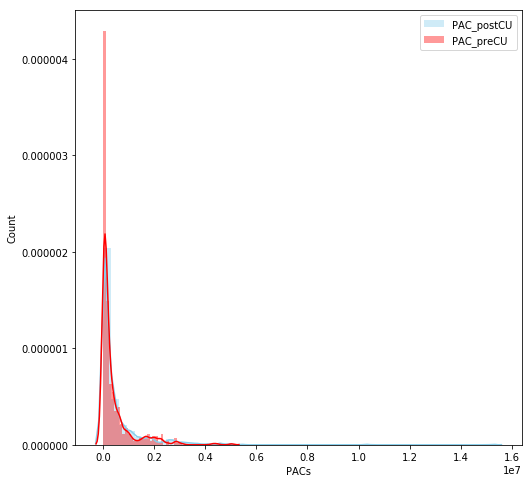

In [405]:
# plt.hist(soft_postCU, soft_preCU)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
sns.distplot(sPAC_postCU , color="skyblue", label="High")
sns.distplot(sPAC_preCU , color="red", label="Low")

ax.legend(['PAC_postCU', 'PAC_preCU'])

# ax.set(xlim=(0, 350))
ax.set_xlabel('PACs')
ax.set_ylabel('Count')
#plt.legend(fontsize='medium', title_fontsize='20')
# plt.title('Density Distribution of Worldwide Gross Box Office by Domestic vs Globally Distributed Films')


In [477]:
# TWO TAIL T TEST FUNCTION
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

def ttest(a1, b1):
    np.random.seed(1)

    # Create sample data.
    a = np.random.randn(40)
    b = 4*np.random.randn(50)

    # Use scipy.stats.ttest_ind.
    t, p = ttest_ind(a1, b1, equal_var=False)
    print("ttest_ind:            t = %g  p = %g" % (t, p))

    # Compute the descriptive statistics of a and b.
    abar = a1.mean()
    avar = a1.var(ddof=1)
    na = a1.size
    adof = na - 1

    bbar = b1.mean()
    bvar = b1.var(ddof=1)
    nb = b1.size
    bdof = nb - 1
    
    diff = abar - bbar

    # Use scipy.stats.ttest_ind_from_stats.
    t2, p2 = ttest_ind_from_stats(abar, np.sqrt(avar), na,
                                  bbar, np.sqrt(bvar), nb,
                                  equal_var=False)
    print("ttest_ind_from_stats: t = %g  p = %g \n" % (t2, p2))

    # Use the formulas directly.
    tf = (abar - bbar) / np.sqrt(avar/na + bvar/nb)
    dof = (avar/na + bvar/nb)**2 / (avar**2/(na**2*adof) + bvar**2/(nb**2*bdof))
    pf = 2*stdtr(dof, -np.abs(tf))
    
    a1_var_name = namestr(a1, globals())[0]
    b1_var_name = namestr(b1, globals())[0]
    
    print("formula:              t = %g  p = %g" % (tf, pf))
    print(f"{a1_var_name} mean = {round(abar,2)} ; {b1_var_name} mean = {round(bbar,2)} ; diff = {round(diff,2)}")


In [467]:
ttest(sPAC_postCU, sPAC_preCU)

ttest_ind:            t = 2.46469  p = 0.013861
ttest_ind_from_stats: t = 2.46469  p = 0.013861 

formula:              t = 2.46469  p = 0.013861
___ mean = 522988.02 ; sPAC_preCU mean = 410902.52 ; diff = 112085.5


In [468]:
ttest(PAC_postCU, PAC_preCU)

ttest_ind:            t = 1.70193  p = 0.08911
ttest_ind_from_stats: t = 1.70193  p = 0.08911 

formula:              t = 1.70193  p = 0.08911
PAC_postCU mean = 480587.91 ; PAC_preCU mean = 410187.7 ; diff = 70400.21


## 2. Contract award of corps w vs w/o PACs

In [421]:
fc_df.columns

Index(['recipient_parent_name1_x', 'current_award_x', 'potential_award_x',
       'offers_received_x', 'num_employees_x', 'annual_revenue_x',
       'award_count_x', 'recipient_name_x', 'organizational_type_x',
       'business_size_x', 'year', 'recipient_name_clean',
       'recipient_parent_name1_y', 'current_award_y', 'potential_award_y',
       'offers_received_y', 'num_employees_y', 'annual_revenue_y',
       'award_count_y', 'recipient_name_y', 'organizational_type_y',
       'business_size_y', 'Cycle', 'Democrats', 'Individuals', 'PACs',
       'Republicans', 'Soft_Indivs', 'Soft_Orgs', 'Total', 'Total1', 'org_id',
       'org_name', 'org_name_clean', 'DemShare', 'RepShare', 'PAC', 'soft'],
      dtype='object')

In [422]:
fc_wPAC = fc_df.loc[(fc_df['PAC']== 1),'current_award_x'].dropna()

In [423]:
fc_woPAC = fc_df.loc[(fc_df['PAC']== 0),'current_award_x'].dropna()

In [471]:
fc_wPAC_postCU = fc_df.loc[(fc_df['PAC']== 1) & (fc_df['year'] >2011),'current_award_x'].dropna()

In [472]:
fc_woPAC_postCU = fc_df.loc[(fc_df['PAC']== 0) & (fc_df['year'] >2011),'current_award_x'].dropna()

In [473]:
fc_wPAC_preCU = fc_df.loc[(fc_df['PAC']== 1) & (fc_df['year'] <=2011),'current_award_x'].dropna()

In [474]:
fc_woPAC_preCU = fc_df.loc[(fc_df['PAC']== 0) & (fc_df['year'] <=2011),'current_award_x'].dropna()

In [469]:
ttest(fc_wPAC, fc_woPAC)

ttest_ind:            t = 3.78077  p = 0.000162707
ttest_ind_from_stats: t = 3.78077  p = 0.000162707 

formula:              t = 3.78077  p = 0.000162707
fc_wPAC mean = 61562896561.83 ; fc_woPAC mean = 3103476302.51 ; diff = 58459420259.31


In [470]:
ttest(pfc_wPAC, pfc_woPAC)

ttest_ind:            t = 3.34568  p = 0.000841473
ttest_ind_from_stats: t = 3.34568  p = 0.000841473 

formula:              t = 3.34568  p = 0.000841473
pfc_wPAC mean = 216924222759.18 ; pfc_woPAC mean = 92609410605.6 ; diff = 124314812153.58


In [475]:
ttest(fc_wPAC_postCU, fc_woPAC_postCU)

ttest_ind:            t = 3.61397  p = 0.00031631
ttest_ind_from_stats: t = 3.61397  p = 0.00031631 

formula:              t = 3.61397  p = 0.00031631
fc_wPAC_postCU mean = 81923688310.28 ; fc_woPAC_postCU mean = 3035866845.71 ; diff = 78887821464.57


In [476]:
ttest(fc_wPAC_preCU, fc_woPAC_preCU)

ttest_ind:            t = 1.90631  p = 0.0571202
ttest_ind_from_stats: t = 1.90631  p = 0.0571202 

formula:              t = 1.90631  p = 0.0571202
fc_wPAC_preCU mean = 13068926519.24 ; fc_woPAC_preCU mean = 3403042314.66 ; diff = 9665884204.58


## 3. Contractors donate the same as non contractors to Dems & Rep

In [423]:
fc_woPAC = fc_df.loc[(fc_df['PAC']== 0),'current_award_x'].dropna()

In [459]:
pfc_wPAC = fc_df.loc[(fc_df['PAC']== 1),'potential_award_x'].dropna()

In [460]:
pfc_woPAC = fc_df.loc[(fc_df['PAC']== 0),'potential_award_x'].dropna()

In [389]:
soft_preCU = fc_df.loc[(fc_df['year']<=2011),'Soft_Orgs'].dropna()

In [393]:
PAC_postCU = fc_df.loc[(fc_df['year']>2011),'PACs'].dropna()

In [394]:
PAC_preCU = fc_df.loc[(fc_df['year']<=2011),'PACs'].dropna()

In [398]:
sPAC_postCU = soft_postCU + PAC_postCU

In [404]:
sPAC_preCU = soft_preCU + PAC_preCU

## Propensity score
Source: https://nbviewer.jupyter.org/github/kellieotto/StatMoments/blob/master/PSM.ipynb

In [159]:
fc_df_dropna = fc_df.dropna(subset=['current_award_x', 'potential_award_x',
                                  'offers_received_x', 'num_employees_x', 'annual_revenue_x',
                                  'award_count_x'])
fc_df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24766 entries, 0 to 24801
Data columns (total 37 columns):
recipient_parent_name1_x    24766 non-null object
current_award_x             24766 non-null float64
potential_award_x           24766 non-null float64
offers_received_x           24766 non-null float64
num_employees_x             24766 non-null float64
annual_revenue_x            24766 non-null float64
award_count_x               24766 non-null float64
recipient_name_x            24766 non-null object
organizational_type_x       7172 non-null object
business_size_x             24766 non-null object
year                        24766 non-null int64
recipient_name_clean        24766 non-null object
Unnamed: 0                  1444 non-null float64
recipient_parent_name1_y    1444 non-null object
current_award_y             1444 non-null float64
potential_award_y           1444 non-null float64
offers_received_y           1444 non-null float64
num_employees_y             1444 non-n

In [162]:
fc_df_dropna.to_csv('fc_df_dropna.csv')

In [163]:
fc_df_dropna.reset_index(inplace = True)

In [235]:
fc_df_dropna = pd.read_csv('fc_df_dropna.csv')

In [236]:
fc_df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24766 entries, 0 to 24765
Data columns (total 38 columns):
Unnamed: 0                  24766 non-null int64
recipient_parent_name1_x    24766 non-null object
current_award_x             24766 non-null float64
potential_award_x           24766 non-null float64
offers_received_x           24766 non-null float64
num_employees_x             24766 non-null float64
annual_revenue_x            24766 non-null float64
award_count_x               24766 non-null float64
recipient_name_x            24766 non-null object
organizational_type_x       7172 non-null object
business_size_x             24766 non-null object
year                        24766 non-null int64
recipient_name_clean        24760 non-null object
Unnamed: 0.1                1444 non-null float64
recipient_parent_name1_y    1444 non-null object
current_award_y             1444 non-null float64
potential_award_y           1444 non-null float64
offers_received_y           1444 non-nu

In [237]:
fc_df_dropna['treated'] = 0

In [238]:
fc_df_dropna.loc[fc_df_dropna['recipient_parent_name1_y'].isnull() == False, 'treated'] = 1

In [137]:
cc_df = o.merge(df, left_on = ['org_name_clean','Cycle'], right_on = ['org_name_clean','year'], how='left')
cc_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41199 entries, 0 to 41198
Data columns (total 42 columns):
Unnamed: 0_x              41199 non-null int64
% to Dems_x               41199 non-null object
% to Repubs_x             41199 non-null object
0                         0 non-null object
1                         0 non-null object
Cycle_x                   41199 non-null float64
Democrats_x               41199 non-null object
Individuals_x             41199 non-null object
PACs_x                    41199 non-null object
Republicans_x             41199 non-null object
Soft (Indivs)_x           39686 non-null object
Soft (Orgs)_x             39686 non-null object
Total_x                   41199 non-null object
Unnamed: 0.1              41199 non-null int64
org_id_x                  41199 non-null object
org_name_x                41199 non-null object
org_name_clean            41199 non-null object
Unnamed: 0_y              1432 non-null float64
recipient_parent_name1    1432 non-n

In [147]:
%matplotlib inline
import math
import numpy as np
import scipy
from scipy.stats import binom, hypergeom
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [242]:
var = ['current_award_x', 'num_employees_x', 'annual_revenue_x']

# var = ['current_award_x', 'offers_received_x', 'num_employees_x', 'annual_revenue_x']
propensity = LogisticRegression()
propensity = propensity.fit(fc_df_dropna[var], fc_df_dropna.treated)
# The predicted propensities by the model
pscore = propensity.predict_proba(fc_df_dropna[var])[:, 1]
print(pscore[:5])

fc_df_dropna['Propensity'] = pscore

[0.50000013 0.50000042 0.50238337 0.50000001 0.5       ]


/Users/ptw/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [239]:
fc_df_dropna.head()

,Unnamed: 0,recipient_parent_name1_x,current_award_x,potential_award_x,offers_received_x,num_employees_x,annual_revenue_x,award_count_x,recipient_name_x,organizational_type_x,...,Individuals,PACs,Republicans,Soft (Indivs),Soft (Orgs),Total,org_id,org_name,org_name_clean,treated
0,0,180SINC,10808156.40,10808156.40,21.0,4.000000e+01,0.000000e+00,1.0,180S INC.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,2020COMPANYLLC,12226118.01,39781218.03,9.0,1.441333e+03,1.260492e+08,1.0,2020 COMPANY LLC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,3MCOMPANY,7838262.46,43427979.83,18310.0,2.854455e+06,1.030003e+12,1.0,3M COMPANY,NaN,...,"$154,571","$284,404","$257,681",$0,$0,"$439,575",D000021800,3M CO,3m,1
3,3,3PHOENIXINC,99966.57,99967.00,2.0,2.300000e+01,3.427000e+06,1.0,3 PHOENIX INC.,CORPORATE NOT TAX EXEMPT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,A2ZINC,150000.00,150000.00,2.0,0.000000e+00,0.000000e+00,1.0,A2Z INC.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [308]:
def Match(groups, propensity, caliper=0.05):
    ''' 
    Inputs:
    groups = Treatment assignments.  Must be 2 groups
    propensity = Propensity scores for each observation. Propensity and groups should be in the same order (matching indices)
    caliper = Maximum difference in matched propensity scores. For now, this is a caliper on the raw
            propensity; Austin reccommends using a caliper on the logit propensity.

    Output:
    A series containing the individuals in the control group matched to the treatment group.
    Note that with caliper matching, not every treated individual may have a match.
    '''

    # Check inputs
    if any(propensity <= 0) or any(propensity >= 1):
        raise ValueError('Propensity scores must be between 0 and 1')
    elif not(0 < caliper < 1):
        raise ValueError('Caliper must be between 0 and 1')
    elif len(groups) != len(propensity):
        raise ValueError('groups and propensity scores must be same dimension')
    elif len(groups.unique()) != 2:
        raise ValueError('wrong number of groups')

    # Code groups as 0 and 1
    groups = groups == groups.unique()[0]
    N = len(groups)
    N1 = groups.sum()
    N2 = N-N1
    g1, g2 = propensity[groups == 1], (propensity[groups == 0])
    # Check if treatment groups got flipped - treatment (coded 1) should be the smaller
    if N1 > N2:
        N1, N2, g1, g2 = N2, N1, g2, g1
        print(N1, N2, g1, g2)

    # Randomly permute the smaller group to get order for matching
    morder = np.random.permutation(N1)
    matches = pd.Series(np.empty(N1))
    matches[:] = np.NAN

    for m in morder:
        dist = abs(g1[m] - g2)
        if dist.min() <= caliper:
            matches[m] = dist.argmin()
            g2 = g2.drop(matches[m])
    return (matches)

In [248]:
fc_df_dropna.sort_values(['treated', 'Propensity'], inplace=True)

In [231]:
fc_df_dropna.reset_index(drop=True, inplace=True)

In [232]:
fc_df_dropna.drop(['level_0','index'])

KeyError: "['level_0' 'index'] not found in axis"

In [222]:
fc_df_dropna.Propensity[fc_df_dropna.treated==1]

2189     0.482115
15823    0.488729
22121    0.491249
2678     0.493444
11004    0.493610
18583    0.498996
13214    0.499235
668      0.499951
19390    0.499998
13866    0.499998
1723     0.499999
19550    0.499999
8796     0.499999
5123     0.500000
2779     0.500000
388      0.500000
7875     0.500000
13641    0.500000
2144     0.500000
3019     0.500000
4225     0.500000
913      0.500000
2742     0.500000
4949     0.500000
123      0.500000
1816     0.500000
8154     0.500000
1418     0.500000
2814     0.500000
9093     0.500000
           ...   
20242    0.506026
19352    0.506572
5907     0.507066
18540    0.507583
5521     0.507910
20791    0.508125
11622    0.508235
9289     0.508436
16553    0.508853
11752    0.508933
23149    0.510385
1658     0.510867
3382     0.510930
6629     0.512827
22233    0.513377
18616    0.513856
10641    0.515706
4374     0.518380
22896    0.519687
7878     0.538403
20397    0.538810
19036    0.541355
15391    0.549207
20825    0.558505
17165    0

In [245]:
fc_df_dropna.iloc[532,:]

Unnamed: 0                                                 532
recipient_parent_name1_x         EDUCATIONDEVELOPMENTCENTERINC
current_award_x                                          10500
potential_award_x                                        10500
offers_received_x                                            1
num_employees_x                                          987.5
annual_revenue_x                                   5.93308e+07
award_count_x                                                1
recipient_name_x            EDUCATION DEVELOPMENT CENTER  INC.
organizational_type_x                                      NaN
business_size_x                      OTHER THAN SMALL BUSINESS
year                                                      2008
recipient_name_clean              education development center
Unnamed: 0.1                                               NaN
recipient_parent_name1_y                                   NaN
current_award_y                                        

In [309]:
stuff = Match(fc_df_dropna.treated, fc_df_dropna.Propensity, caliper = 0.9999999999999999)
g1, g2 = fc_df_dropna.Propensity[fc_df_dropna.treated==1], fc_df_dropna.Propensity[fc_df_dropna.treated==0]


1444 23322 2189     0.482115
15823    0.488729
22121    0.491249
2678     0.493444
11004    0.493610
18583    0.498996
13214    0.499235
668      0.499951
19390    0.499998
13866    0.499998
1723     0.499999
19550    0.499999
8796     0.499999
5123     0.500000
2779     0.500000
388      0.500000
7875     0.500000
13641    0.500000
2144     0.500000
3019     0.500000
4225     0.500000
913      0.500000
2742     0.500000
4949     0.500000
123      0.500000
1816     0.500000
8154     0.500000
1418     0.500000
2814     0.500000
9093     0.500000
           ...   
20242    0.506026
19352    0.506572
5907     0.507066
18540    0.507583
5521     0.507910
20791    0.508125
11622    0.508235
9289     0.508436
16553    0.508853
11752    0.508933
23149    0.510385
1658     0.510867
3382     0.510930
6629     0.512827
22233    0.513377
18616    0.513856
10641    0.515706
4374     0.518380
22896    0.519687
7878     0.538403
20397    0.538810
19036    0.541355
15391    0.549207
20825    0.558505

KeyError: 59

In [252]:
! pip install causalinference

    100% |████████████████████████████████| 61kB 381kB/s ta 0:00:01
  Stored in directory: /Users/ptw/Library/Caches/pip/wheels/31/3b/84/6b475799114c4c8cbaa401aff4e9fe088fc12acf55c83c1d2a
Successfully built causalinference


In [253]:
! pip install pymatch

  Stored in directory: /Users/ptw/Library/Caches/pip/wheels/95/c4/23/2d06fb55633c2fc4b416d12f1881486a876c0e0cfce8b9cd6f
Successfully built pymatch


In [254]:
import warnings
warnings.filterwarnings('ignore')
from pymatch.Matcher import Matcher
import pandas as pd
import numpy as np
%matplotlib inline

In [277]:
test = fc_df_dropna[fc_df_dropna.treated == 1]
control = fc_df_dropna[fc_df_dropna.treated == 0]
test['treat_status'] = 1
control['treat_status'] = 0


In [278]:
test.columns

Index(['Unnamed: 0', 'recipient_parent_name1_x', 'current_award_x',
       'potential_award_x', 'offers_received_x', 'num_employees_x',
       'annual_revenue_x', 'award_count_x', 'recipient_name_x',
       'organizational_type_x', 'business_size_x', 'year',
       'recipient_name_clean', 'Unnamed: 0.1', 'recipient_parent_name1_y',
       'current_award_y', 'potential_award_y', 'offers_received_y',
       'num_employees_y', 'annual_revenue_y', 'award_count_y',
       'recipient_name_y', 'organizational_type_y', 'business_size_y',
       '% to Dems', '% to Repubs', 'Cycle', 'Democrats', 'Individuals', 'PACs',
       'Republicans', 'Soft (Indivs)', 'Soft (Orgs)', 'Total', 'org_id',
       'org_name', 'org_name_clean', 'treated', 'Propensity', 'treat_status'],
      dtype='object')

In [279]:
test = test[['recipient_parent_name1_x','current_award_x',
       'potential_award_x', 'offers_received_x', 'num_employees_x',
       'annual_revenue_x', 'award_count_x','treat_status']]

In [280]:
test.head()

,recipient_parent_name1_x,current_award_x,potential_award_x,offers_received_x,num_employees_x,annual_revenue_x,award_count_x,treat_status
2189,BAXTERINTERNATIONALINC,15318.75,1.531875e+04,4.0,1.050000e+09,1.300000e+09,1.0,1
15823,NESTLESA,53054.27,5.922580e+07,132.0,6.617864e+08,2.802191e+09,2.0,1
22121,NESTLESA,579288.04,2.046028e+08,112.0,5.142009e+08,5.065863e+09,2.0,1
2678,EDISONINTERNATIONAL,936591.07,9.365911e+05,22.0,3.854040e+08,5.123470e+09,2.0,1
11004,NESTLESA,150000.00,1.500000e+05,23.0,3.750003e+08,3.750000e+08,1.0,1


In [281]:
control = control[['recipient_parent_name1_x', 'current_award_x',
       'potential_award_x', 'offers_received_x', 'num_employees_x',
       'annual_revenue_x', 'award_count_x','treat_status']]

In [285]:
m = Matcher(test, control, yvar="treat_status", exclude=['recipient_parent_name1_x'])


Formula:
treat_status ~ current_award_x+potential_award_x+offers_received_x+num_employees_x+annual_revenue_x+award_count_x
n majority: 23322
n minority: 1444


In [288]:
m.fit_scores(nmodels = 1)

Fitting Models on Balanced Samples: 1\1Error: Unable to coerce to Series, length must be 1: given 2888
Fitting Models on Balanced Samples: 1\1Error: Unable to coerce to Series, length must be 1: given 2888
Fitting Models on Balanced Samples: 1\1Error: Unable to coerce to Series, length must be 1: given 2888
Fitting Models on Balanced Samples: 1\1Error: Unable to coerce to Series, length must be 1: given 2888
Fitting Models on Balanced Samples: 1\1Error: Unable to coerce to Series, length must be 1: given 2888

Average Accuracy: nan%


In [289]:
m.predict_scores()

IndexError: list index out of range

## Notes

In [75]:
f = open('/Users/ptw/wwget/totals.php?id=D000042417', "r")
# use readlines to read all lines in the file
# The variable "lines" is a list containing all lines in the file
lines = f.readlines()

# close the file after reading the lines.
f.close()
n1 = lines[8]

In [76]:
lines

['\n',
 '\n',
 '<!DOCTYPE html>\n',
 '<html lang="en">\n',
 '<head>\n',
 '<meta charset="utf-8" />\n',
 '\n',
 '<script type="e80724e77d08faebb2b07472-text/javascript">var _sf_startpt=(new Date()).getTime()</script>\n',
 '<title>Charming Shoppes Inc: Total Contributions | OpenSecrets</title>\n',
 '\n',
 '<meta name="description" content="Find the companies and other organizations seeking to influence U.S. politics and policy via campaign donations and lobbying spending, and see which members of Congress hold stock in those companies.">\n',
 '<meta name="keywords" content="Charming Shoppes Inc, organization, corporation, money, politics, contributions, lobbying">\n',
 '\n',
 '<meta name="twitter:card" content="summary" />\n',
 '<meta name="twitter:site" content="@opensecretsdc" />\n',
 '    <meta name="twitter:title" content="Charming Shoppes Inc: Total Contributions" />\n',
 '<meta name="twitter:image" content="https://s3.amazonaws.com/assets2.opensecrets.org/img/twitter-card-os-logo.p

In [30]:
lines[8]

'<title>Joseph E Seagram & Sons: Total Contributions | OpenSecrets</title>\n'

In [39]:
def search(s):
    result = re.search('<title>(.*): Total Contributions | OpenSecrets</title>\n', s).group(1)
    return result

In [40]:
search(n1)

'Joseph E Seagram & Sons'

In [34]:
import re

s = 'asdf=5;iwantthis123jasd'
result = re.search('asdf=5;(.*)123jasd', s)
print(result.group(1))

iwantthis


In [35]:
def f(x):
     return pd.Series(dict(current_award = x['current_total_value_of_award'].sum(),
                           potential_award = x['potential_total_value_of_award'].sum(), 
                           offers_received = x['number_of_offers_received'].sum(), 
                           num_employees = x['number_of_employees'].mean(), 
                           annual_revenue = x['annual_revenue'].mean(),
                           award_count = x['recipient_parent_name1'].count(),
                           recipient_name = x['recipient_parent_name'].unique()[0], 
                           organizational_type = x['organizational_type'].unique()[0],
                           business_size = x['contracting_officers_determination_of_business_size'].unique()[0]))

fc_ga = fc_all.groupby(['recipient_parent_name1']).apply(f)

In [36]:
fc_ga.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143342 entries, 03SLINDUSTRIESINC to ZZOUNDSMUSICLLC
Data columns (total 9 columns):
current_award          143342 non-null float64
potential_award        143342 non-null float64
offers_received        143342 non-null float64
num_employees          140144 non-null float64
annual_revenue         140144 non-null float64
award_count            143342 non-null int64
recipient_name         143342 non-null object
organizational_type    54459 non-null object
business_size          143340 non-null object
dtypes: float64(5), int64(1), object(3)
memory usage: 10.9+ MB


In [39]:
fc_ga['current_award'].describe()

count    1.433420e+05
mean     1.127675e+09
std      1.177024e+11
min     -4.442410e+07
25%      1.877388e+04
50%      9.764700e+04
75%      8.663967e+05
max      2.707611e+13
Name: current_award, dtype: float64

In [40]:
fc_ga['offers_received'].describe()

count    1.433420e+05
mean     2.623437e+03
std      1.067916e+05
min      0.000000e+00
25%      2.000000e+00
50%      7.000000e+00
75%      3.700000e+01
max      2.763210e+07
Name: offers_received, dtype: float64

In [41]:
fc_ga['num_employees'].describe()

count    1.401440e+05
mean     3.396357e+04
std      5.710751e+06
min      0.000000e+00
25%      2.000000e+00
50%      1.000000e+01
75%      4.500000e+01
max      1.914000e+09
Name: num_employees, dtype: float64

In [42]:
fc_ga['annual_revenue'].describe()

count    1.401440e+05
mean     1.972496e+09
std      4.491652e+11
min      0.000000e+00
25%      1.700000e+05
50%      1.500000e+06
75%      8.000000e+06
max      1.667251e+14
Name: annual_revenue, dtype: float64

In [43]:
fc_ga['award_count'].describe()

count    143342.000000
mean          4.727547
std           6.072896
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max          48.000000
Name: award_count, dtype: float64

In [50]:
fc_test = fc_ga[fc_ga['current_award'] > 10000000]
len(fc_test)

14791

In [53]:
conlist = fc_test['recipient_name'].unique()

In [65]:
len(conlist)

14791

In [66]:
fc = fc_g[fc_g['current_award']>0]
fc.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 328161 entries, (03SLINDUSTRIESINC, 2017) to (ZZOUNDSMUSICLLC, 2018)
Data columns (total 9 columns):
current_award          328161 non-null float64
potential_award        328161 non-null float64
offers_received        328161 non-null float64
num_employees          322156 non-null float64
annual_revenue         322156 non-null float64
award_count            328161 non-null int64
recipient_name         328161 non-null object
organizational_type    145565 non-null object
business_size          328158 non-null object
dtypes: float64(5), int64(1), object(3)
memory usage: 25.2+ MB


In [133]:
len(conlist)

151139

In [67]:
fc = fc[~fc['recipient_name'].isin(conlist)]
fc.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 262696 entries, (03SLINDUSTRIESINC, 2017) to (ZZOUNDSMUSICLLC, 2018)
Data columns (total 9 columns):
current_award          262696 non-null float64
potential_award        262696 non-null float64
offers_received        262696 non-null float64
num_employees          256863 non-null float64
annual_revenue         256863 non-null float64
award_count            262696 non-null int64
recipient_name         262696 non-null object
organizational_type    118567 non-null object
business_size          262693 non-null object
dtypes: float64(5), int64(1), object(3)
memory usage: 20.4+ MB


In [68]:
fc['current_award'].describe()

count    2.626960e+05
mean     3.068108e+07
std      9.982622e+09
min      1.000000e-02
25%      1.258176e+04
50%      4.893627e+04
75%      2.390374e+05
max      4.959147e+12
Name: current_award, dtype: float64

In [ ]:
ms =[]
for i in conlist:
    print(i.split())
    ss = i.split()
    for s in ss:
        ms.append(s)

In [77]:
len(ms)

52343

In [90]:
from collections import Counter
counts = Counter(ms)
print(counts)

Counter({'INC.': 5406, 'LLC': 3098, 'INC': 1734, 'CORPORATION': 998, 'SERVICES': 965, '&': 874, 'CONSTRUCTION': 748, 'GROUP': 720, 'SOLUTIONS': 601, 'COMPANY': 541, 'SYSTEMS': 525, 'OF': 470, 'THE': 441, 'TECHNOLOGIES': 436, 'AND': 374, 'INCORPORATED': 359, 'TECHNOLOGY': 344, 'ASSOCIATES': 340, 'INTERNATIONAL': 316, 'CONSULTING': 305, 'MANAGEMENT': 303, 'JOINT': 286, 'VENTURE': 283, 'ENGINEERING': 268, 'JV': 258, 'RESEARCH': 207, 'L.L.C.': 205, 'ENTERPRISES': 190, 'INDUSTRIES': 186, 'CO.': 180, 'CORP.': 174, 'UNIVERSITY': 153, 'CONTRACTING': 148, 'A': 146, 'AMERICAN': 140, 'GLOBAL': 134, 'HOLDINGS': 129, 'SERVICE': 128, 'CORP': 124, 'HEALTH': 111, 'SECURITY': 110, 'ENVIRONMENTAL': 109, 'FOR': 104, 'INFORMATION': 101, 'LTD.': 100, 'MEDICAL': 99, 'CENTER': 97, 'ADVANCED': 96, 'FEDERAL': 95, 'GOVERNMENT': 92, 'STATE': 88, 'SERVICES,': 87, 'ELECTRIC': 86, 'DEVELOPMENT': 85, 'NATIONAL': 85, 'TECHNICAL': 84, 'SUPPORT': 82, 'DEFENSE': 82, 'RESOURCES': 81, 'MARINE': 80, 'INSTITUTE': 77, 'ENERG

In [75]:
sms = set(ms)        
sms

{'MODULAR',
 'TOSOH',
 'BROSS',
 'ANGELES',
 'XSB',
 'S&I',
 'SANBERG',
 "BLAGG'S",
 'METSON',
 'EDGEWATER',
 'ADSYNC',
 'NATT',
 'CAMPUS',
 'DIDION',
 'CALLAHAN',
 'PRISON',
 'KODAK',
 'SHORESIDE',
 'PARTNERS',
 'LITIGATION',
 'DECICCO',
 'GOVERNOR',
 'RALLY',
 'PAPER',
 'RWJ',
 'TOYAKOI',
 'AXXUM',
 'L.C.',
 'OPTIMOS',
 'CONFERENCE',
 'AGR,',
 'SPAW',
 'NATURAL',
 'CAPTAINS',
 'DEKATRON',
 'LEIDOS',
 'ALCOHOL',
 'CIMMARON',
 'KUBOTA',
 'VALUE',
 'IV',
 'DATUM',
 'C-FAR',
 'MONSTER',
 'INC/DIAZ',
 'EURPAC',
 'ALANIZ',
 'CUSTODIAL',
 'REMI',
 'SALE',
 'TREVOR',
 'STORM',
 'OKAWA',
 'MICROLINK',
 'BTL',
 'HORST',
 'MERCURY',
 'DANAHER',
 'BECKLEY',
 'CFM/SEVERN',
 'OFFICESOURCE',
 'ZIOBRO',
 'MIRAMAR',
 'SOLUTION',
 'ROLAC',
 'PRUITT',
 'CATVIDEO',
 'BZ-JV',
 'REEF',
 'SABIN',
 'DESIGNS',
 'HANOVER',
 'B3',
 'CELLERANT',
 'AKAL',
 'LATIGOS',
 'ZERO',
 'WAKE',
 'T.H.R.',
 'INFRASCAN,',
 'TRIMAN',
 'XOTECH',
 'STARKS',
 'NAVAJO',
 'PARATUSEC',
 'STICHTING',
 'INVESTEC',
 'CYRUS',
 'PERSON

In [76]:
len(sms)

12180

In [107]:
testlist = [k for k, v in counts.items() if v>99]

In [108]:
len(testlist)

45

In [109]:
testlist

['LLC',
 'INC.',
 'GROUP',
 'CONSULTING',
 'AMERICAN',
 'SYSTEMS',
 'AND',
 'SERVICES',
 'COMPANY',
 'L.L.C.',
 'FOR',
 'THE',
 'TECHNOLOGIES',
 'ENTERPRISES',
 'CONSTRUCTION',
 'RESEARCH',
 'SOLUTIONS',
 'INCORPORATED',
 'TECHNOLOGY',
 'CORP.',
 'INC',
 '&',
 'INTERNATIONAL',
 'CORPORATION',
 'JV',
 'CORP',
 'ENGINEERING',
 'CONTRACTING',
 'A',
 'ENVIRONMENTAL',
 'OF',
 'INDUSTRIES',
 'INFORMATION',
 'JOINT',
 'VENTURE',
 'CO.',
 'ASSOCIATES',
 'SERVICE',
 'SECURITY',
 'LTD.',
 'MANAGEMENT',
 'GLOBAL',
 'HOLDINGS',
 'HEALTH',
 'UNIVERSITY']

In [110]:
osc = ['LLC', 'LLC.', 'INC', 'INC.', 'INC..', 'SYSTEMS/SUPPORTABILITY', 'ORGANIZATIONAL', 'CORPORATION)''(ATL)',
       '(OF', 'VIRGINIA)', 'ADVANCEMED', 'MFG.CO.', "INC/HAMP'S", ':', '(SPECIAL', '(MD)', '+', '-', ':',
       'PROJECTS)', '(INC)', 'LTD', 'LLP', 'LLC.']

In [112]:
sc = testlist + osc
len(sc)

69

In [131]:
os = sms - set(sc)

In [132]:
len(os)

12117

In [146]:
os

{'MODULAR',
 'TOSOH',
 'BROSS',
 'ANGELES',
 'XSB',
 'S&I',
 'SANBERG',
 "BLAGG'S",
 'METSON',
 'EDGEWATER',
 'ADSYNC',
 'NATT',
 'CAMPUS',
 'DIDION',
 'CALLAHAN',
 'PRISON',
 'KODAK',
 'SHORESIDE',
 'PARTNERS',
 'LITIGATION',
 'DECICCO',
 'GOVERNOR',
 'RALLY',
 'PAPER',
 'RWJ',
 'TOYAKOI',
 'AXXUM',
 'L.C.',
 'OPTIMOS',
 'CONFERENCE',
 'AGR,',
 'SPAW',
 'NATURAL',
 'CAPTAINS',
 'DEKATRON',
 'LEIDOS',
 'ALCOHOL',
 'CIMMARON',
 'KUBOTA',
 'VALUE',
 'IV',
 'DATUM',
 'C-FAR',
 'MONSTER',
 'INC/DIAZ',
 'EURPAC',
 'ALANIZ',
 'CUSTODIAL',
 'REMI',
 'SALE',
 'TREVOR',
 'STORM',
 'OKAWA',
 'MICROLINK',
 'BTL',
 'HORST',
 'MERCURY',
 'DANAHER',
 'BECKLEY',
 'CFM/SEVERN',
 'OFFICESOURCE',
 'ZIOBRO',
 'MIRAMAR',
 'SOLUTION',
 'ROLAC',
 'PRUITT',
 'CATVIDEO',
 'BZ-JV',
 'REEF',
 'SABIN',
 'DESIGNS',
 'HANOVER',
 'B3',
 'CELLERANT',
 'AKAL',
 'LATIGOS',
 'ZERO',
 'WAKE',
 'T.H.R.',
 'INFRASCAN,',
 'TRIMAN',
 'XOTECH',
 'STARKS',
 'NAVAJO',
 'PARATUSEC',
 'STICHTING',
 'INVESTEC',
 'CYRUS',
 'PERSON

In [ ]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import json
import re

In [ ]:
# read in your api key
with open('crp_api_key.json') as f:
    secret = json.load(f)

In [136]:
testos = list(os)[:10]
testos

['MODULAR',
 'TOSOH',
 'BROSS',
 'ANGELES',
 'XSB',
 'S&I',
 'SANBERG',
 "BLAGG'S",
 'METSON',
 'EDGEWATER']

In [145]:
testos[0][0:3]

'MOD'

In [137]:
api_key = '4e784f9457742ea204144d1d577c2aeb'

In [142]:
import requests
from bs4 import BeautifulSoup
import json
import re

def get_ids_for_orgs(org_string, api_key):
    """
    Takes in a partial string of an organization's name, 
    and saves a dataframe of all organizations containing the string
    along with each organization's ID. 
    
    Also need to pass in your CRP API key.
    """
    for os in org_string:
        url = f'https://www.opensecrets.org/api/?method=getOrgs&org={os}&apikey=' + api_key
        resp = requests.get(url)
        print(resp.status_code)
        soup = BeautifulSoup(resp.content, 'html.parser')
        org_ids = []
        org_names = []

        for org in soup.find_all('organization'):
            org_ids.append(org['orgid'])
            org_names.append(org['orgname'].strip())
        
        df = pd.DataFrame({'org_id':org_ids, 'org_names':org_names})  # change to org_name!!!
        filepath = 'data/crp_ids_' + org_string + '.csv'
        df.to_csv(filepath, index=False)
        print('Saved file', filepath)

In [143]:
get_ids_for_orgs(testos, api_key)

404


TypeError: can only concatenate str (not "list") to str

In [15]:
s =[]
for i, y in enumerate(year):
#     print(i, y)
    for j in range(1, table[i]+1):
        df = pd.read_csv(f"{y}_{j}_grouped.csv")
        s.append(len(df))
s

[8965, 7863, 7546, 6813, 3612, 11221, 9728, 9252, 4940]

In [16]:
sum(s)

69940

In [18]:
df2 = pd.read_csv('2018_6_grouped.csv')

In [21]:
df2.columns#.shape

Index(['recipient_parent_name1', 'current_total_value_of_award',
       'current_total_value_of_award.1', 'number_of_offers_received',
       'recipient_parent_duns', 'number_of_employees', 'annual_revenue',
       'awards_counts', 'recipient_name', 'recipient_parent_name',
       'organizational_type',
       'contracting_officers_determination_of_business_size',
       'organizational_type.1', 'year'],
      dtype='object')

In [23]:
contracts_all.columns

Index(['recipient_parent_name1', 'current_total_value_of_award',
       'current_total_value_of_award.1', 'number_of_offers_received',
       'number_of_employees', 'annual_revenue', 'awards_counts',
       'recipient_name', 'recipient_parent_name', 'organizational_type',
       'contracting_officers_determination_of_business_size',
       'organizational_type.1', 'year'],
      dtype='object')

In [ ]:
# In [20]: df.groupby("dummy").agg({"returns": [np.mean, np.sum]})

#         grouped1 = contracts_all.groupby(['recipient_parent_name1','year'])['current_total_value_of_award',
#                                                           'potential_total_value_of_award',
#                                                           'number_of_offers_received'].sum()
#         grouped2 = df.groupby(['recipient_parent_name1'])['number_of_employees',
#                                                           'annual_revenue'].mean()
#         grouped3 = pd.DataFrame(df.groupby(['recipient_parent_name1'])[
#                                 'recipient_parent_name1'].count())
#         grouped3.columns = ['awards_counts']
#         merged1 = grouped1.merge(grouped2, left_on='recipient_parent_name1',
#                                  right_on='recipient_parent_name1', how='inner')
#         merged2 = merged1.merge(grouped3, left_on='recipient_parent_name1',
#                                 right_on='recipient_parent_name1', how='inner')
#         df1 = df[['recipient_parent_name1','recipient_name', 'recipient_parent_name',
#                   'organizational_type','contracting_officers_determination_of_business_size',
#                                   'organizational_type']]
#         merged = merged2.merge(df1, left_on='recipient_parent_name1',
#                        right_on='recipient_parent_name1', suffixes=('_m', '_df'), how='left')
#         merged.drop_duplicates(subset = 'recipient_parent_name1', keep='first', inplace=True)

In [31]:
dict(x=1)

{'x': 1}

In [16]:
fc_all[:10].groupby(['recipient_parent_name1', 'year'])['recipient_parent_name'].apply(lambda x: x.unique()[0])

recipient_parent_name1      year
123COMPUTERSUPPLIESINC      2008           123 COMPUTER SUPPLIES INC
17MACHINERYLLC              2008                   17 MACHINERY  LLC
1BEYONDINC                  2008                      1 BEYOND  INC.
1MDINC                      2008                           1MD  INC.
1SOURCEMATERIALHANDLINGINC  2008    1 SOURCE MATERIAL HANDLING  INC.
2020COMPANYLLC              2008                   2020 COMPANY  LLC
2PISOLUTIONSINC             2008                   2PI SOLUTIONS INC
3MCOMPANY                   2008                          3M COMPANY
3VETSINC                    2008                        3-VETS  INC.
4IMPRINTGROUPPLC            2008                  4IMPRINT GROUP PLC
Name: recipient_parent_name, dtype: object

In [17]:
fc_all[:100].groupby(['recipient_parent_name1', 'year'])['organizational_type'].apply(lambda x: x.unique()[0])

recipient_parent_name1                                         year
123COMPUTERSUPPLIESINC                                         2008                         NaN
17MACHINERYLLC                                                 2008    CORPORATE NOT TAX EXEMPT
1BEYONDINC                                                     2008                         NaN
1MDINC                                                         2008    CORPORATE NOT TAX EXEMPT
1SOURCEMATERIALHANDLINGINC                                     2008                         NaN
2020COMPANYLLC                                                 2008                         NaN
2PISOLUTIONSINC                                                2008                         NaN
3MCOMPANY                                                      2008                         NaN
3VETSINC                                                       2008                         NaN
4IMPRINTGROUPPLC                                               2008 

In [ ]:
fc_g = fc_all.groupby(['recipient_parent_name1', 'year']).agg(
    {'current_total_value_of_award': [np.sum], 'potential_total_value_of_award': [np.sum], 
    'number_of_offers_received': [np.sum], 'number_of_employees':[np.mean], 'annual_revenue': [np.mean],
    'recipient_parent_name1': ['count']})
fc_g

In [58]:
contribs_all = pd.DataFrame()
tables = pd.read_html('/Users/ptw/wwget/totals.php?id=D000000002')
contribs = tables[0]
f = open('/Users/ptw/wwget/totals.php?id=D000000002', "r")
# use readlines to read all lines in the file
# The variable "lines" is a list containing all lines in the file
lines = f.readlines()
title = lines[8]
# close the file after reading the lines.
f.close()
name = re.search('<title>(.*): Total Contributions | OpenSecrets</title>\n', title).group(1)

# contribs['org_id'] = row['org_id']
contribs['org_name'] = name  
cols = list(contribs.columns.copy())
cols.insert(0, cols.pop())
cols.insert(0, cols.pop())
contribs = contribs[cols]
contribs_all = pd.concat([contribs_all, contribs])
contribs_all = contribs_all.reset_index(drop=True)
contribs_all

,Soft (Orgs),org_name,Cycle,Total,Democrats,Republicans,% to Dems,% to Repubs,Individuals,PACs,Soft (Indivs)
0,NaN,NationsBank,TOTAL,NaN,NaN,NaN,0%,0%,NaN,NaN,NaN
